In [25]:
#############################################################
#
# NBA Individual Player Performance Prediction
#
#############################################################
import sys, os
sys.path.append("../..")
sys.path.append("..")
sys.path.append(os.getcwd())

from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import copy
import pickle

from mrsc.src.model.SVDmodel import SVDmodel
from mrsc.src.model.Target import Target
from mrsc.src.model.Donor import Donor
from mrsc.src.synthcontrol.mRSC import mRSC
from mrsc.src.importData import *
import mrsc.src.utils as utils

from mrsc.src.from_tslib.svdWrapper import SVDWrapper as SVD
from mrsc.src.from_tslib.tsSVDModel import SVDModel
from mrsc.src.from_tslib import tsUtils

plt.rcParams.update({'font.size': 14})

In [249]:
def hsvt(df, rank): 
    """
    Input:
        df: matrix of interest
        rank: rank of output matrix
    Output:
        thresholded matrix
    """
    u, s, v = np.linalg.svd(df, full_matrices=False)
    s[rank:].fill(0)
    vals = (np.dot(u*s, v))
    return pd.DataFrame(vals, index = df.index, columns = df.columns)

def svd_spectrum(df, n):
    # svd spectrum for the first n singvals
    u, s, vh = np.linalg.svd(df)
    
    plt.title("Singular Value Spectrum - the largest {} values".format(n))
    plt.plot(s[:n])
    plt.show()
    for k in range(1,n+1):
        print(k,"th singular value: ", np.sum(s[:k])/np.sum(s))

In [167]:
data = pd.read_csv("../data/surveyFeatsFall2013.csv")
data

,user_id,timestamp,Happiness_Morning,Alertness_Evening,Alertness_Morning,Calmness_Morning,Calmness_Evening,Health_Evening,Happiness_Evening,Health_Morning,...,positive_interaction,negative_interaction,academic_duration,exercise_occations,exercise_duration,extracurricular_duration,sleep_try_time_mins_since_midnight,wake_time_mins_since_midnight,caffeine_time_mins_since_midnight,first_event_mins_since_midnight
0,CS13M001,10/28/13 0:00,96.0,22.0,69.0,8.0,72.0,81.0,83.0,97.0,...,0.0,0.0,10800.0,1.0,7200.0,0.0,5.0,490.0,1160.0,540.0
1,CS13M001,10/29/13 0:00,79.0,66.0,36.0,24.0,59.0,87.0,74.0,74.0,...,0.0,0.0,23400.0,1.0,7200.0,0.0,-30.0,450.0,1150.0,540.0
2,CS13M001,10/30/13 0:00,71.0,93.0,75.0,44.0,20.0,90.0,92.0,71.0,...,0.0,0.0,14400.0,1.0,7200.0,0.0,20.0,510.0,1155.0,600.0
3,CS13M001,10/31/13 0:00,48.0,36.0,54.0,30.0,50.0,77.0,72.0,77.0,...,0.0,0.0,26625.0,1.0,7200.0,0.0,20.0,448.0,1290.0,540.0
4,CS13M001,11/1/13 0:00,50.0,72.0,26.0,45.0,77.0,43.0,72.0,77.0,...,0.0,0.0,11400.0,1.0,7200.0,0.0,30.0,474.0,780.0,660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,CS13M020,11/22/13 0:00,85.0,72.0,56.0,31.0,36.0,89.0,87.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,180.0,570.0,900.0,NaN
596,CS13M020,11/23/13 0:00,87.0,82.0,74.0,32.0,32.0,84.0,84.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,180.0,570.0,720.0,NaN
597,CS13M020,11/24/13 0:00,52.0,85.0,65.0,50.0,39.0,76.0,83.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,360.0,1020.0,NaN
598,CS13M020,11/25/13 0:00,72.0,89.0,74.0,48.0,37.0,76.0,75.0,79.0,...,0.0,0.0,16200.0,0.0,0.0,0.0,150.0,610.0,1260.0,660.0


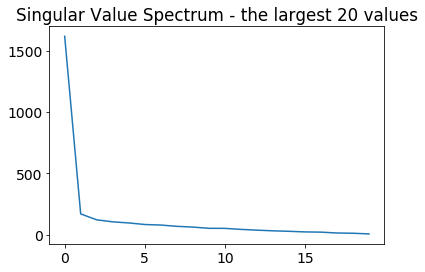

1 th singular value:  0.5878058340284135
2 th singular value:  0.6499396472104289
3 th singular value:  0.69456546303056
4 th singular value:  0.7331918438822818
5 th singular value:  0.7686478589805189
6 th singular value:  0.7994333344123724
7 th singular value:  0.828622700443367
8 th singular value:  0.8540570834793138
9 th singular value:  0.8772449142714941
10 th singular value:  0.8967931000457008
11 th singular value:  0.9161829575791686
12 th singular value:  0.9325121691241998
13 th singular value:  0.9466242642864254
14 th singular value:  0.9587270397397515
15 th singular value:  0.9693919681883341
16 th singular value:  0.9782742809669671
17 th singular value:  0.9864681083120801
18 th singular value:  0.9921406777132901
19 th singular value:  0.997050624080699
20 th singular value:  1.0


In [251]:
metric = "Happiness_Morning"
#####
example_table = pd.pivot_table(data, values=metric, index="user_id", columns="timestamp")
example_table = example_table.T.fillna(example_table.mean(axis=1), axis=0).T
svd_spectrum(example_table, 20)
target_ids = list(example_table.index)

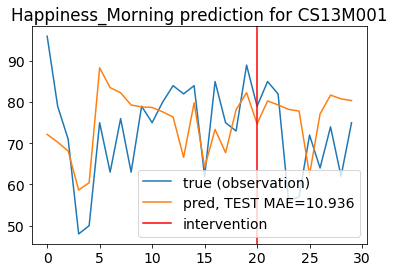

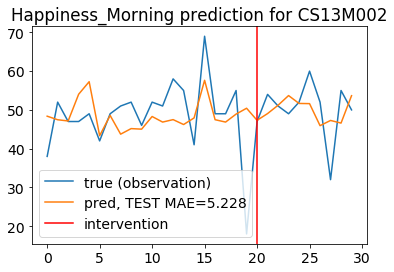

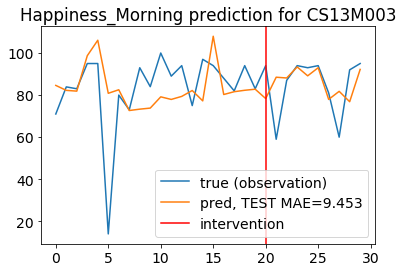

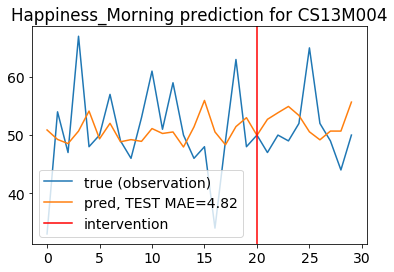

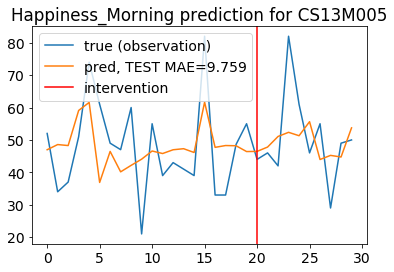

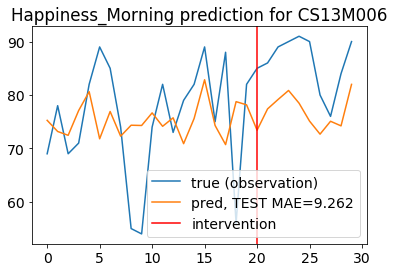

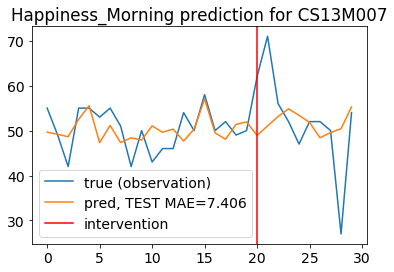

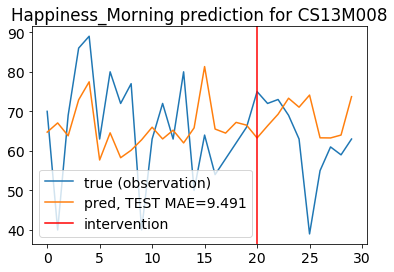

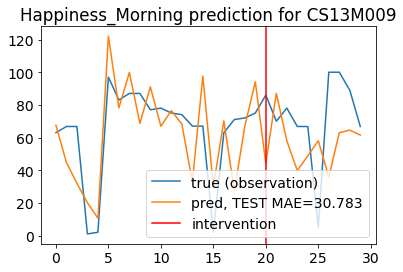

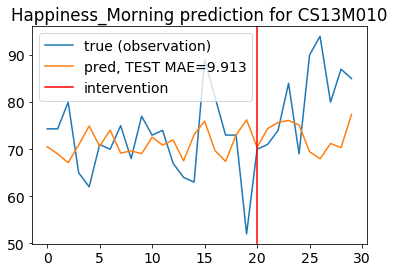

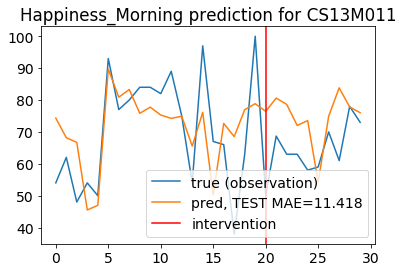

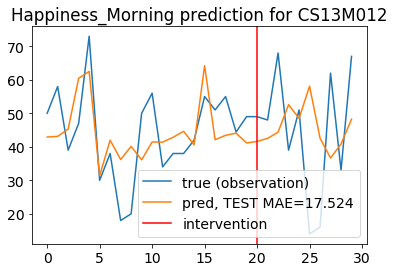

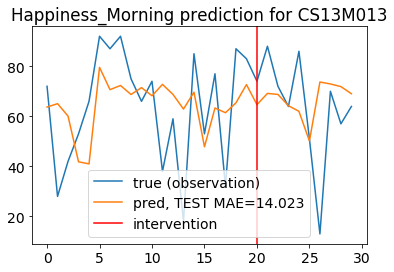

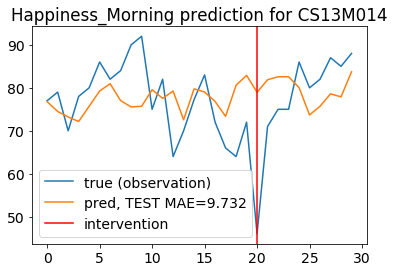

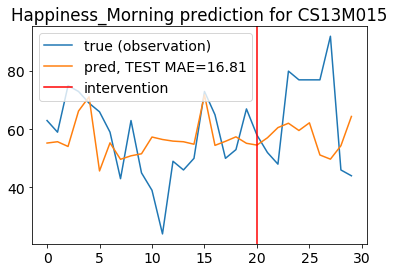

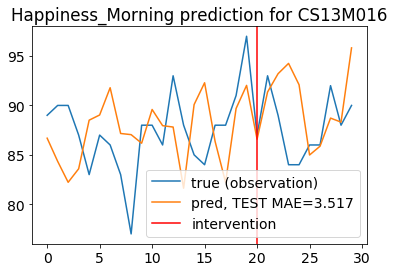

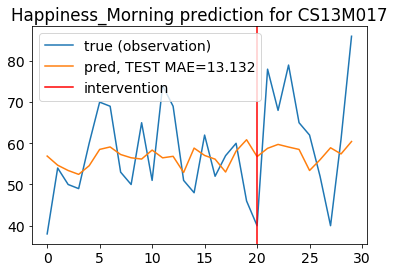

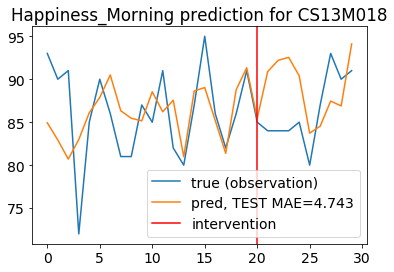

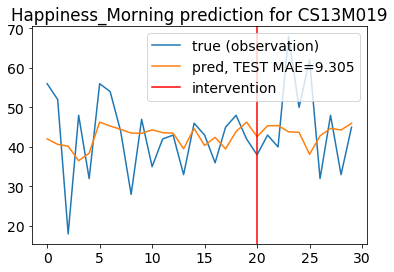

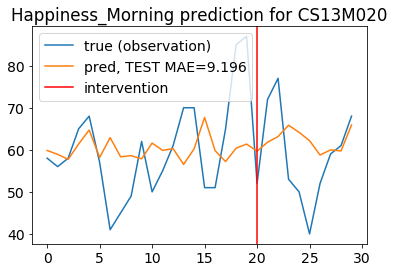

In [262]:
target_id = 'CS13M001'
intervention = 20
numSingvals = 2

#####
mae_list = []
for target_id in target_ids:
    example_table_pre = example_table.iloc[:,:intervention]
    example_table_post = example_table.iloc[:,intervention:]
    donor = example_table.loc[example_table.index != target_id]

    example_table_pre_hsvt = utils.hsvt(example_table_pre, numSingvals)
    target_train = example_table_pre_hsvt.loc[target_id]
    donor_train = example_table_pre_hsvt.loc[example_table.index != target_id]

    target_test = example_table_post.loc[target_id]
    donor_test = example_table_post.loc[example_table.index != target_id]

    beta = np.dot(target_train.T, np.linalg.pinv(donor_train))
    pred = np.dot(donor.T, beta)
    mae = np.mean(np.abs(pred[intervention:] - target_test))
    mae_list.append(mae)

#     beta2 = np.linalg.lstsq(donor_train.T,target_train)[0]
#     pred2 = np.dot(donor.T, beta2)
#     mae2 = np.mean(np.abs(pred2[intervention:] - target_test))

    plt.title("{} prediction for {}".format(metric, target_id))
    plt.plot(example_table.loc[target_id].values, label="true (observation)")
    plt.plot(pred, label = "pred, TEST MAE={}".format(mae.round(3)))
#     plt.plot(pred2, label = "pred2, TEST MAE={}".format(mae2.round(3)))
    plt.axvline(intervention, color="red", label= "intervention")
    plt.legend()
    plt.show()

In [263]:
np.mean(mae_list)

10.822548184838052